<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
from pandas import Series as sr
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set(color_codes=True)

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [3]:
df1=pd.read_csv('malaria.csv')
df1

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
123,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
a=df1.isnull().all(axis=1)
np.where(a==True)

(array([ 4, 21, 39, 99], dtype=int64),)

In [5]:
df1.isnull().all(axis=1).sum()

4

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
df2=(df1.isnull().sum()/df1.shape[0]*100)
mask1=(df1.isnull().sum()/df1.shape[0]*100)>60
df2[mask1]

Cases_Nigeria     70.078740
Cases_Senegal     80.314961
Cases_Spain       87.401575
Cases_Mali        90.551181
Deaths_Nigeria    70.078740
Deaths_Senegal    82.677165
Deaths_Spain      87.401575
Deaths_Mali       90.551181
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
df1.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
a=df1[['Cases_Guinea','Deaths_Guinea']]

In [9]:
b1=df1[['Cases_Liberia','Deaths_Liberia']]

In [10]:
c=df1[['Cases_SierraLeone','Deaths_SierraLeone']]

In [11]:
d=df1[['Cases_Nigeria','Deaths_Nigeria']]

In [12]:
a

,Cases_Guinea,Deaths_Guinea
0,2776.0,1786.0
1,2775.0,1781.0
2,2769.0,1767.0
3,NaN,NaN
4,NaN,NaN
...,...,...
122,103.0,66.0
123,86.0,62.0
124,86.0,60.0
125,86.0,59.0


In [13]:
a.isnull().sum().sum()

69

In [14]:
b1.isnull().sum().sum()

90

In [15]:
c.isnull().sum().sum()

80

In [16]:
d.isnull().sum().sum()

178

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

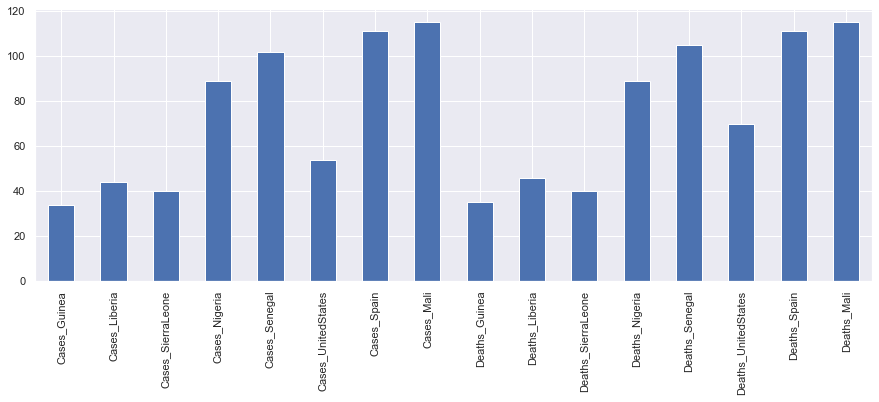

In [11]:
plt.figure(figsize=(15,5))
df1.isnull().sum().plot(kind='bar')
#sns.barplot(data=df1.isnull())
plt.show()

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
df1.dropna(thresh=3,axis=0)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
5,2730.0,8115.0,9633.0,NaN,NaN,7.0,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,127.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,83.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
119,122.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,80.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
120,112.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
121,112.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,70.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN


In [19]:
df1.shape

(127, 16)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
df1[df1.dropna(thresh=127*0.4,axis=1).columns]

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_UnitedStates,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_UnitedStates
0,2776.0,NaN,10030.0,NaN,1786.0,NaN,2977.0,NaN
1,2775.0,NaN,9780.0,NaN,1781.0,NaN,2943.0,NaN
2,2769.0,8166.0,9722.0,20.0,1767.0,3496.0,2915.0,3.0
3,NaN,8157.0,NaN,10.0,NaN,3496.0,NaN,8.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,66.0,6.0,5.0,NaN
123,86.0,NaN,NaN,NaN,62.0,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,60.0,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,59.0,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
df1['Cases_Liberia'].isnull().value_counts()

False    83
True     44
Name: Cases_Liberia, dtype: int64

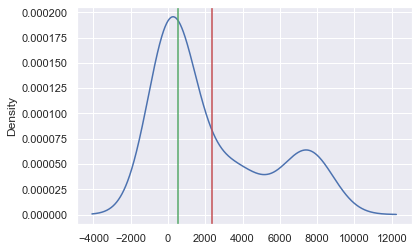

In [22]:
df1['Cases_Liberia'].plot(kind='density')
plt.axvline(df1['Cases_Liberia'].mean(),color='r')
plt.axvline(df1['Cases_Liberia'].median(),color='g')
plt.show()

In [23]:
m=df1['Cases_Liberia'].median()

In [24]:
df1['Cases_Liberia'].fillna(m)

0       516.0
1       516.0
2      8166.0
3      8157.0
4       516.0
        ...  
122       8.0
123     516.0
124     516.0
125     516.0
126     516.0
Name: Cases_Liberia, Length: 127, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
df1['Cases_UnitedStates'].isnull().value_counts()

False    73
True     54
Name: Cases_UnitedStates, dtype: int64

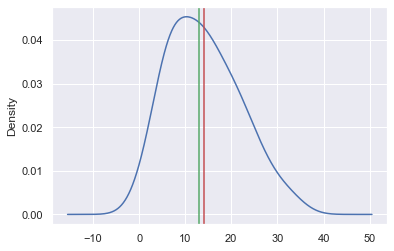

In [26]:
df1['Cases_UnitedStates'].plot(kind='density')
plt.axvline(df1['Cases_UnitedStates'].mean(),color='r')
plt.axvline(df1['Cases_UnitedStates'].median(),color='g')
plt.show()

In [27]:
m1=df1['Cases_UnitedStates'].mean()
m1

14.068493150684931

In [28]:
m2=df1['Cases_UnitedStates'].median()
m2

13.0

In [29]:
df1['Cases_UnitedStates'].fillna(m2)

0      13.0
1      13.0
2      20.0
3      10.0
4      13.0
       ... 
122    13.0
123    13.0
124    13.0
125    13.0
126    13.0
Name: Cases_UnitedStates, Length: 127, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

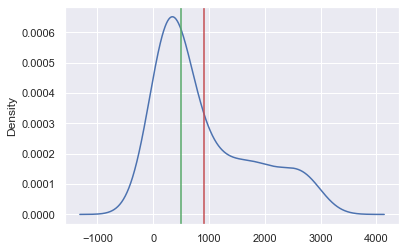

In [30]:
a['Cases_Guinea'].plot(kind='density')
plt.axvline(a['Cases_Guinea'].mean(),color='r')
plt.axvline(a['Cases_Guinea'].median(),color='g')
plt.show()

In [31]:
mc=a['Cases_Guinea'].median()
mc

495.0

In [32]:
a['Cases_Guinea'].fillna(mc)

0      2776.0
1      2775.0
2      2769.0
3       495.0
4       495.0
        ...  
122     103.0
123      86.0
124      86.0
125      86.0
126      49.0
Name: Cases_Guinea, Length: 127, dtype: float64

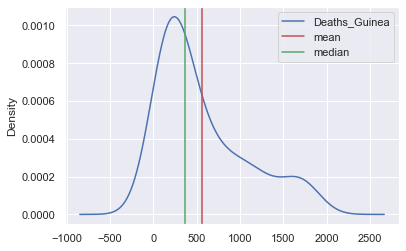

In [33]:
a['Deaths_Guinea'].plot(kind='density')
plt.axvline(a['Deaths_Guinea'].mean(),color='r',label='mean')
plt.axvline(a['Deaths_Guinea'].median(),color='g',label='median')
plt.legend()
plt.show()

In [34]:
md=a['Deaths_Guinea'].mean()
md

563.2391304347826

In [35]:
mdn=a['Deaths_Guinea'].median()
mdn

360.5

In [36]:
a['Deaths_Guinea'].fillna(mdn)

0      1786.0
1      1781.0
2      1767.0
3       360.5
4       360.5
        ...  
122      66.0
123      62.0
124      60.0
125      59.0
126      29.0
Name: Deaths_Guinea, Length: 127, dtype: float64

## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
df2=pd.read_csv('house.csv')
df2.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


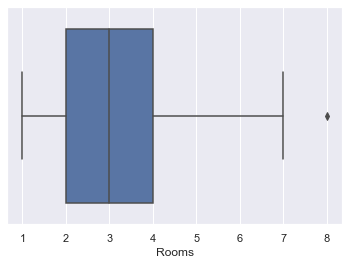

In [38]:
sns.boxplot(x=df2['Rooms'])
plt.show()

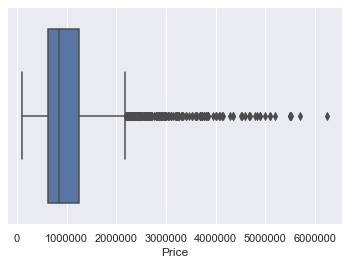

In [39]:
sns.boxplot(x=df2['Price'])
plt.show()

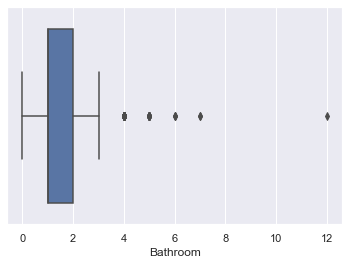

In [40]:
sns.boxplot(x=df2['Bathroom'])
plt.show()

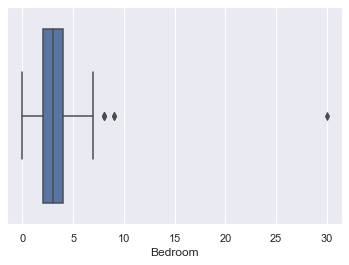

In [41]:
sns.boxplot(x=df2['Bedroom'])
plt.show()

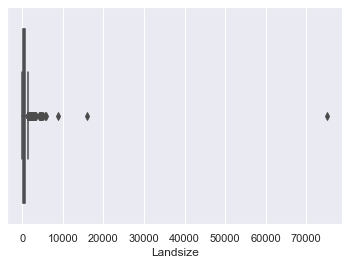

In [42]:
sns.boxplot(x=df2['Landsize'])
plt.show()

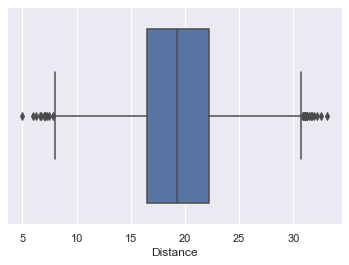

In [43]:
sns.boxplot(x=df2['Distance'])
plt.show()

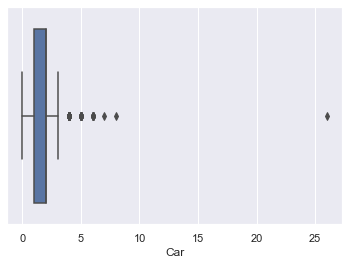

In [44]:
sns.boxplot(x=df2['Car'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

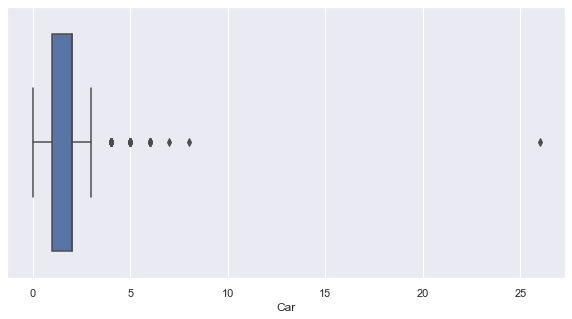

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df2['Car'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
df2.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


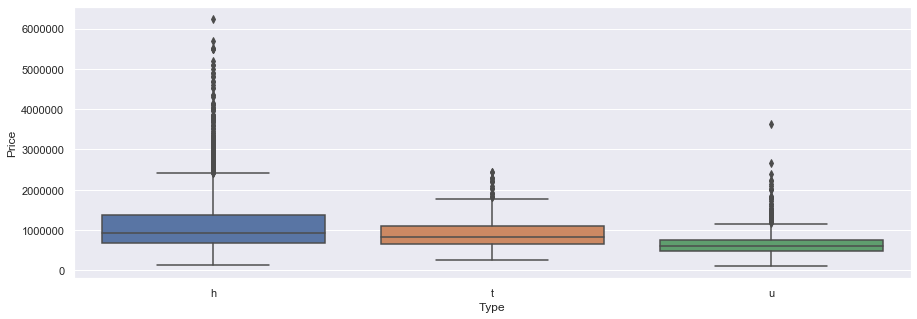

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(y=df2['Price'],x=df2['Type'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

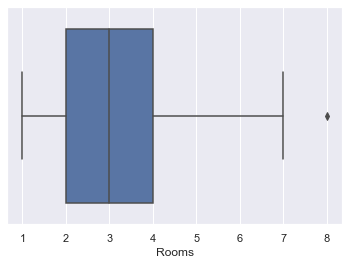

In [48]:
sns.boxplot(x=df2['Rooms'])
plt.show()

In [49]:
df2['Rooms'].quantile(0.25)

2.0

In [50]:
df2['Rooms'].quantile(0.50)

3.0

In [51]:
df2['Rooms'].quantile(0.75)

4.0

In [52]:
iqr=df2['Rooms'].quantile(0.75)-df2['Rooms'].quantile(0.25)

In [53]:
ul=df2['Rooms'].quantile(0.75)+(1.5*iqr)

In [54]:
ul

7.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
iqr1=df2['Bathroom'].quantile(0.75)-df2['Bathroom'].quantile(0.25)
iqr1

1.0

In [56]:
qn1=df2['Bathroom'].quantile(0.25)
qn1

1.0

In [57]:
qn2=df2['Bathroom'].quantile(0.50)
qn2

1.0

In [58]:
qn3=df2['Bathroom'].quantile(0.75)
qn3

2.0

In [59]:
upper=qn3+(1.5*iqr1)
upper

3.5

In [60]:
lower=qn1-(1.5*iqr1)
lower

-0.5

In [61]:
dbh=df2[(df2['Bathroom']<lower) | (df2['Bathroom']>upper)]
dbh

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
103,3,t,385000,S,Northern Metropolitan,7,0,435,18.0,3
122,3,t,950000,S,Eastern Metropolitan,4,4,809,19.3,3
229,1,u,337000,S,South-Eastern Metropolitan,4,2,662,12.7,3
382,3,h,720000,S,Western Metropolitan,5,2,755,14.0,4
448,3,h,1116000,S,Southern Metropolitan,5,4,673,19.0,3
...,...,...,...,...,...,...,...,...,...,...
4093,2,u,560000,PI,Southern Metropolitan,4,2,355,11.6,3
4132,2,u,600000,S,Southern Metropolitan,4,2,636,27.2,2
4497,4,h,1730000,S,Southern Metropolitan,4,3,569,23.8,3
4681,3,h,870000,VB,Western Metropolitan,4,3,188,20.4,2


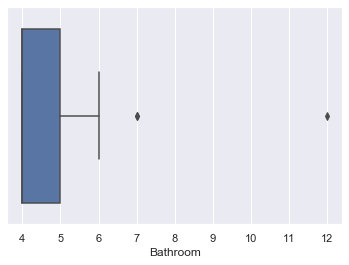

In [62]:
sns.boxplot(x=dbh['Bathroom'])
plt.show()

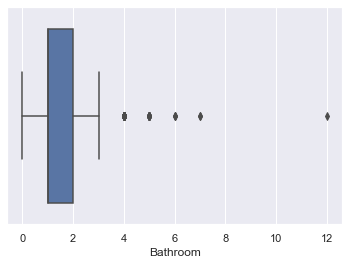

In [63]:
sns.boxplot(x=df2['Bathroom'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
iqr2=df2['Bedroom'].quantile(0.75)-df2['Bedroom'].quantile(0.25)
iqr2

2.0

In [65]:
qb1=df2['Bedroom'].quantile(0.25)
qb1

2.0

In [66]:
qb2=df2['Bedroom'].quantile(0.50)
qb2

3.0

In [67]:
qb3=df2['Bedroom'].quantile(0.75)
qb3

4.0

In [68]:
u1=qb3+(1.5*iqr2)
u1

7.0

In [69]:
l1=qb1-(1.5*iqr2)
l1

-1.0

In [70]:
outlier_bed=df2[(df2['Bedroom']<l1) | (df2['Bedroom']>u1)]
outlier_bed

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
279,3,t,1100000,S,Southern Metropolitan,1,1,0,12.1,8
467,2,u,612000,S,South-Eastern Metropolitan,1,2,766,27.1,9
1228,3,h,470000,PI,Western Metropolitan,2,2,486,20.9,9
1937,3,h,496000,S,Western Metropolitan,1,1,0,21.7,30
4241,3,h,825000,S,Eastern Metropolitan,2,2,296,21.2,8
4249,3,t,750000,S,Western Metropolitan,2,0,311,22.1,8


<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [110]:
df2['Distance'].mean()

19.32834662190515

In [111]:
iqr=df2['Distance'].quantile(0.75)-df2['Distance'].quantile(0.25)
iqr

5.699999999999999

In [112]:
q1=df2['Distance'].quantile(0.25)
q1

16.5

In [113]:
q2=df2['Distance'].quantile(0.50)
q2

19.3

In [114]:
q3=df2['Distance'].quantile(0.75)
q3

22.2

In [115]:
ul=q3+(1.5*iqr)
ul 

30.75

In [77]:
ll=q1-(1.5*iqr)
ll

7.950000000000001

In [116]:
df3=df2[(df2['Distance']>ll) & (df2['Distance']<ul)]
df3

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,distance group
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2,category(25-35)
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2,category(15-25)
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2,category(15-25)
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,category(15-25)
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,category(15-25)
...,...,...,...,...,...,...,...,...,...,...,...
4761,3,h,1150000,VB,Southern Metropolitan,2,1,305,18.7,3,category(15-25)
4762,3,h,712000,S,South-Eastern Metropolitan,1,0,105,16.0,4,category(15-25)
4763,4,h,800000,S,South-Eastern Metropolitan,1,0,120,24.5,3,category(15-25)
4764,3,u,747000,S,South-Eastern Metropolitan,1,1,0,22.9,3,category(15-25)


In [117]:
df2['Distance'].mean()-df3['Distance'].mean()

0.016921067522904565

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

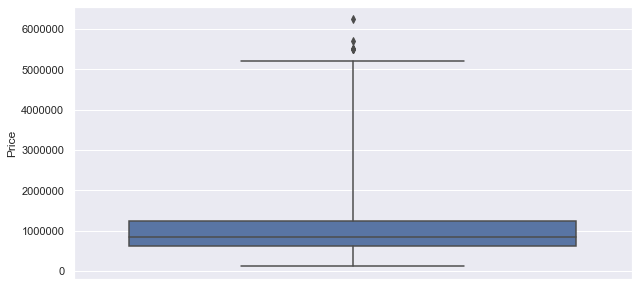

In [104]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df2['Price'],whis=6.5)
plt.show()

In [105]:
df2['Price'].describe()

count    4.766000e+03
mean     1.019577e+06
std      6.292254e+05
min      1.120000e+05
25%      6.200000e+05
50%      8.400000e+05
75%      1.244250e+06
max      6.240000e+06
Name: Price, dtype: float64

In [118]:
qt3=1.244250e+06

In [119]:
qt1=6.200000e+05

In [120]:
ir=qt3-qt1
ir

624250.0

In [123]:
k1=(df2['Price'].max()-qt3)/ir
k1

8.002803364036843

In [125]:
k2=(df2['Price'].min()+qt1)/ir
k2

1.1726071285542652

In [126]:
k=k1-k2
k

6.830196235482578

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [80]:
df2['Type'].value_counts()

h    3353
u     920
t     493
Name: Type, dtype: int64

In [81]:
df2['Distance'].describe()

count    4766.000000
mean       19.328347
std         4.230650
min         5.000000
25%        16.500000
50%        19.300000
75%        22.200000
max        33.100000
Name: Distance, dtype: float64

In [82]:
# 4-15,15-25,25-35 -- group frequencies for distance feature

In [83]:
df2["distance group"]=pd.cut(x=df2['Distance'],bins=[4,15,25,35],labels=['category(4-15)','category(15-25)','category(25-35)'])

In [84]:
df2.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,distance group
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2,category(25-35)
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2,category(15-25)
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2,category(15-25)
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,category(15-25)
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,category(15-25)


In [85]:
df2["distance group"].value_counts()

category(15-25)    3615
category(4-15)      747
category(25-35)     404
Name: distance group, dtype: int64

In [86]:
df2['Distance'].max()

33.1

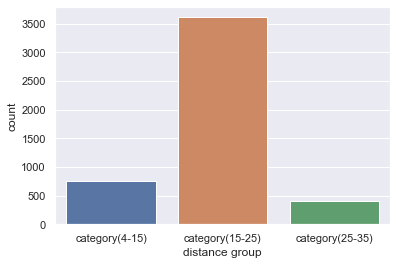

In [87]:
sns.countplot(x=df2['distance group'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

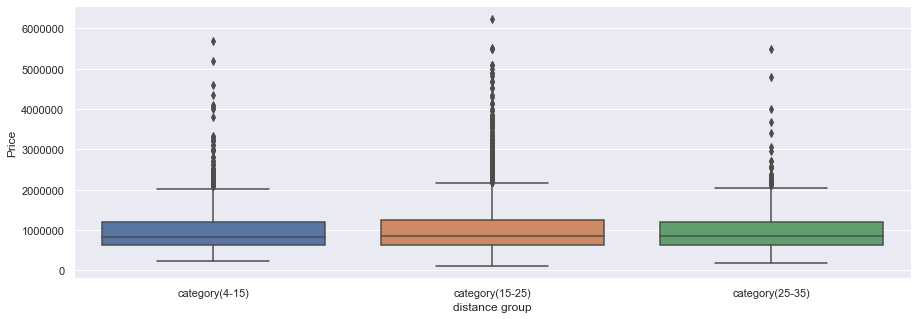

In [88]:
plt.figure(figsize=(15,5))
sns.boxplot(y=df2['Price'],x=df2['distance group'])
plt.show()

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [89]:
x=df2.drop('Price',inplace=False,axis=1)
x.head()

,Rooms,Type,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,distance group
0,3,h,S,Northern Metropolitan,1,1,126,25.2,2,category(25-35)
1,3,h,S,Northern Metropolitan,1,1,202,21.8,2,category(15-25)
2,3,h,S,Northern Metropolitan,1,0,156,21.7,2,category(15-25)
3,3,h,S,Western Metropolitan,2,1,0,18.8,3,category(15-25)
4,2,h,S,Western Metropolitan,2,0,134,20.6,3,category(15-25)


In [90]:
y=df2['Price']
y.head()

0    1490000
1    1220000
2    1420000
3    1515000
4     670000
Name: Price, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [93]:
x_train.shape

(3812, 10)

In [94]:
y_train.shape

(3812,)

In [95]:
x_test.shape

(954, 10)

In [96]:
y_test.shape

(954,)